<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Single scattering albdeo (SSA)

The single scattering albedo (SSA) represents the ratio of scattering efficiency to total light extinction at a specific wavelength for a particular aerosol particle. The parameter plays a crucial role in determining the aerosol radiative effect.

SSA is calculated using the following equation:

$\omega _0 = \frac{\sigma _S}{\sigma _S + \sigma _A} $  

Here, $\sigma _S$ and $\sigma _A$ correspond to the scattering and absoprtion coefficients, respectively. The ratio can take on values between 0 and 1. Where $\omega _0 = 1$ means the particle only scatters light, and $\omega _0=0$ indicates that the particle only absorbs light. 

The aerosol light absorption coefficient is measured using a filter absorption photometer, such as AE33, MAAP, CLAP, and similar devices. Meanwhile, the aerosol light scattering coefficient is measured with a nephelometer. It is important to note that these instruments can measure at multiple wavelengths. When determining the single scattering albedo, it is necessary to work with coefficients measured at the same wavelength. In the following examples, it will be demonstrated how to calculate the SSA using coefficients obtained at the same wavelength. Additionally, it will show how to derive the SSA when the data is measured at different wavelengths. 

**References**

NASA. (2015). Science of Deep Blue. Retrieved from https://earth.gsfc.nasa.gov/climate/data/deep-blue/science

## Finding datasets

You can search in the EBAS thredds catalog for datasets as shown below. For determining the SSA please note that you want two datasets, using nephelometer and filter absoprtion photometer, from the same station. You must also check to see that the measurements are for the same aerosol particle size, and that the measurements overlap in time, to make the calculations valid.

In [3]:
# Importing useful python libraries
import xarray as xr 
import threddsclient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
import json

In [2]:
# Get the EBAS thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/ebas/catalog.html')

In [3]:
# Get all nephelometer opendap urls
fap_opendap_urls = [x for x in all_opendap_urls if 'nephelometer' in x]
print('All EBAS nephelometer datasets with opendap protocol: \n',fap_opendap_urls)

All EBAS nephelometer datasets with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/ebas/ZA0001G.20060101000000.20150916120046.nephelometer..pm10.8y.1h.ZA02L_TSI_3563_CPT_pm10.ZA02L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/ZA0001G.20050101000000.20150916115726.nephelometer..pm1.9y.1h.ZA02L_TSI_3563_CPT_pm1.ZA02L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/VN0001R.20140101000000.20190521143237.nephelometer..aerosol.5y.1h.VN01L_Ecotech_Aurora3000_PDI_dry.VN01L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US9085R.20031001070000.20181031145000.nephelometer..instrument.7y.1h.US11L_Optec-NGN-2.US11L_IMPROVE_nephelometer_2004.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US9084R.19961002070000.20120222000000.nephelometer..instrument.5y.1h.US11L_Optec-NGN-2_US9048.US11L_IMPROVE_nephelometer_2004.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US9084R.19961001070000.20181031145000.nephelometer..instrument.5y

In [4]:
# Search for instance for a wanted station
stat_opendap_urls = [x for x in fap_opendap_urls if "US0035R" in x]
print("All EBAS nephelometer datasets at station US0035R with opendap protocol: \n", stat_opendap_urls)

All EBAS nephelometer datasets at station US0035R with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.20000101000000.20230222131433.nephelometer...23y.1h.US06L_TSI_3563_BND_pm10.US06L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.20000101000000.20230222131054.nephelometer...23y.1h.US06L_TSI_3563_BND_pm1.US06L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19970101000000.20230222131433.nephelometer..pm10.3y.1h.US06L_TSI_3563_BND_pm10.US06L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19970101000000.20230222131054.nephelometer..pm1.3y.1h.US06L_TSI_3563_BND_pm1.US06L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19960101000000.20230222131433.nephelometer...1y.1h.US06L_TSI_3563_BND_pm10.US06L_scat_coef.lev2.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19960101000000.20230222131054.nephelometer...1y.1h.US06L_TSI_3563_BND_pm1.US06L_scat_coef.lev2.nc', 

In [5]:
# Choosing a dataset, nephelometer
opendap_url = stat_opendap_urls[4]  
opendap_url

'https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19960101000000.20230222131433.nephelometer...1y.1h.US06L_TSI_3563_BND_pm10.US06L_scat_coef.lev2.nc'

Follow the same steps, search for filter_absorption_photometer at the same station, and choose a dataset corresponding with the timespan as the first.

In [6]:
# Filter absorption photometer dataset
opendap_url1 = "https://thredds.nilu.no/thredds/dodsC/ebas/US0035R.19960101000000.20200311082648.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.10y.1h.US06L_RadianceResearch_PSAP-1W_BND_pm10.US06L_abs_coef.lev2.nc"

## Example 1

In the first example, the datasets we have chosen contains the scattering and absorption coefficients measured at the same wavelength, $\lambda = 550 nm$.

Now that we have found our datasets, we want to open them by assigning each to an xarray. The datasets may contain various variables, so it would be useful to extract the ones you are interested in, as demonstrated below.

In [7]:
# Opening and showing dataset with xarray
neph_ds = xr.open_dataset(opendap_url)  # nephelometer dataset
phot_ds = xr.open_dataset(opendap_url1)  # photometer dataset

In [8]:
neph_ds

<xarray.Dataset>
Dimensions:                                                         (
                                                                     time: 8784,
                                                                     tbnds: 2,
                                                                     metadata_time: 1,
                                                                     Wavelength: 3,
                                                                     Location: 1,
                                                                     ...
                                                                     aerosol_light_scattering_coefficient_prec1587_qc_flags: 1,
                                                                     aerosol_light_scattering_coefficient_perc8413_qc_flags: 1,
                                                                     pressure_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_prec1587_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_perc8413_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_amean_qc_flags: 1)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
  * metadata_time                                                   (metadata_time) datetime64[ns] ...
  * Wavelength                                                      (Wavelength) float64 ...
  * Location                                                        (Location) |S64 ...
Dimensions without coordinates: tbnds, temperature_qc_flags,
                                aerosol_light_scattering_coefficient_amean_qc_flags,
                                aerosol_light_scattering_coefficient_prec1587_qc_flags,
                                aerosol_light_scattering_coefficient_perc8413_qc_flags,
                                pressure_qc_flags,
                                aerosol_light_backscattering_coefficient_prec1587_qc_flags,
                                aerosol_light_backscattering_coefficient_perc8413_qc_flags,
                                aerosol_light_backscattering_coefficient_amean_qc_flags
Data variables: (12/26)
    time_bnds                                                       (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                              (metadata_time, tbnds) datetime64[ns] ...
    aerosol_light_scattering_coefficient_amean_ebasmetadata         (Wavelength, metadata_time) |S64 ...
    temperature_qc                                                  (Location, temperature_qc_flags, time) float64 ...
    aerosol_light_scattering_coefficient_prec1587_ebasmetadata      (Wavelength, metadata_time) |S64 ...
    aerosol_light_scattering_coefficient_amean_qc                   (Wavelength, aerosol_light_scattering_coefficient_amean_qc_flags, time) float64 ...
    ...                                                              ...
    temperature                                                     (Location, time) float64 ...
    aerosol_light_scattering_coefficient_prec1587                   (Wavelength, time) float64 ...
    pressure                                                        (Location, time) float64 ...
    aerosol_light_backscattering_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_light_scattering_coefficient_perc8413                   (Wavelength, time) float64 ...
    aerosol_light_backscattering_coefficient_prec1587               (Wavelength, time) float64 ...
Attributes: (12/100)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of n...
    keywords:                          Bondville, NOAA-ESRL, US0

In [9]:
phot_ds

<xarray.Dataset>
Dimensions:                                               (time: 87672,
                                                           tbnds: 2,
                                                           metadata_time: 10,
                                                           Wavelength: 1,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 1,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 1,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 1)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables:
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    aerosol_absorption_coefficient_amean_qc               (Wavelength, aerosol_absorption_coefficient_amean_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_qc            (Wavelength, aerosol_absorption_coefficient_prec1587_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_amean_ebasmetadata     (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_perc8413_qc            (Wavelength, aerosol_absorption_coefficient_perc8413_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/52)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of aeros...
    keywords:                      Bondville, NOAA-ESRL, US0035R, pm10, aeros...
    id:                            US0035R.19960101000000.20200311082648.filt...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

From the two datasets above, we observe that both of them contain measurements at a wavelength of 550 nm. Additionally, they both possess multiple variables. To make further operations easier, it is beneficial to extract the variables of interest, which in this case is the coefficient means.

In [10]:
# extracting variables and wavelengths of interest

# Absorption
ab = phot_ds["aerosol_absorption_coefficient_amean"]
ab_coeff = ab.sel(Wavelength = 550)

# Scattering
sc = neph_ds["aerosol_light_scattering_coefficient_amean"]
sc_coeff = sc.sel(Wavelength = 550.0) 

 As seen in the metadata of the measurements, using the xarrays, the data obtained from the nephelometer includes measurements solely from 1996, whereas the data acquired from the filter absorption photometer spans from 1996 to 2005. When this is the case, we want only want to look at the data from 1996 given by the filter absorption photometer.

In [11]:
# Check the datasets for big gaps in time, and adjust according to.

ab_coeff = ab_coeff.sel(time=slice("1996-01-01", "1996-12-31")) # matching the time to the scattering values

In [12]:
# Converting to dataframe
sc = sc_coeff.to_dataframe()
ab = ab_coeff.to_dataframe()

### Plotting of raw data

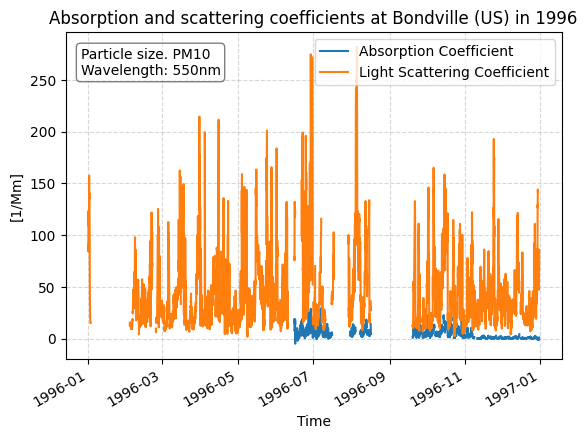

In [13]:
# Plotting the coefficients
ab["aerosol_absorption_coefficient_amean"].plot()
sc["aerosol_light_scattering_coefficient_amean"].plot()

plt.title("Absorption and scattering coefficients at Bondville (US) in 1996")
plt.xlabel("Time")
plt.ylabel("[1/Mm]")
plt.legend(["Absorption Coefficient", "Light Scattering Coefficient"])
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.03, 0.87, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)

Example on how to plot the two coefficients on different y-axis, getting a better view of the absorption coefficient:

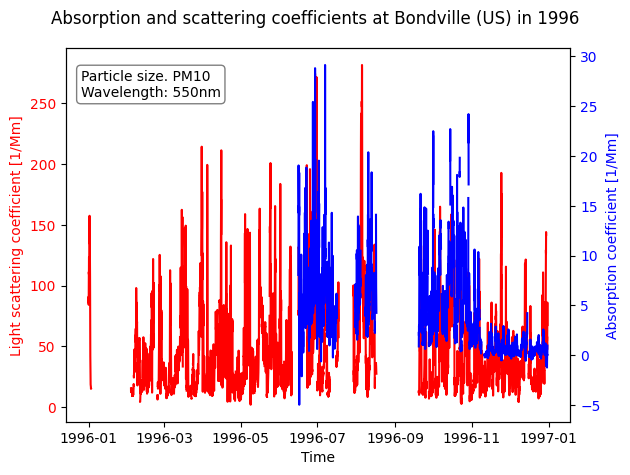

In [14]:
fig, ax1 = plt.subplots()

fig.suptitle("Absorption and scattering coefficients at Bondville (US) in 1996")

ax1.set_xlabel("Time")
ax1.set_ylabel("Light scattering coefficient [1/Mm]", color = "red")
ax1.plot(sc["aerosol_light_scattering_coefficient_amean"], color = "red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()

ax2.set_ylabel('Absorption coefficient [1/Mm]', color="blue") 
ax2.plot(ab["aerosol_absorption_coefficient_amean"], color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.03, 0.87, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)

fig.tight_layout()  
plt.show()

There is a large gap in the datasets, for the example's sake, we look at the last part of the times series below.

In [15]:
# A big gap in the datasets, so we focus on the last months of 1996:

ab = ab_coeff.sel(time=slice("1996-10","1996-12"))
sc = sc_coeff.sel(time=slice("1996-10","1996-12"))

sc = sc.to_dataframe()
ab = ab.to_dataframe()

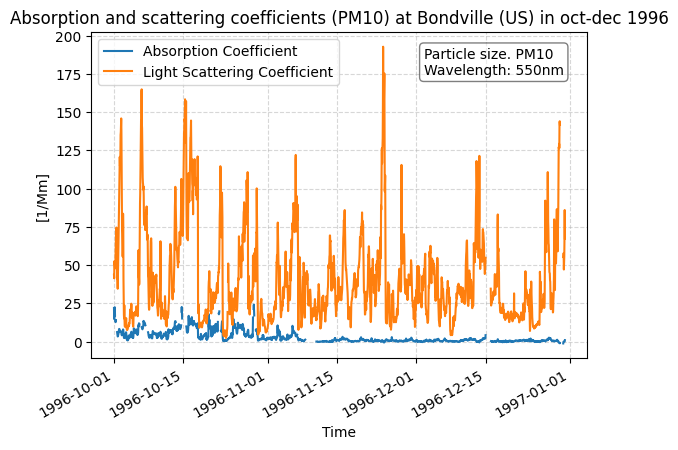

In [16]:
# Plotting the coefficients
ab["aerosol_absorption_coefficient_amean"].plot()
sc["aerosol_light_scattering_coefficient_amean"].plot()

plt.title("Absorption and scattering coefficients (PM10) at Bondville (US) in oct-dec 1996")
plt.xlabel("Time")
plt.ylabel("[1/Mm]")
plt.legend(["Absorption Coefficient", "Light Scattering Coefficient"])
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.67, 0.87, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)

### Calculating SSA

In [17]:
# Calculating the SSA

# Due to NaNs in the datasets,it might be useful to calculate SSA using an if/else test:

def SSA(s,a):
    # s, a are the scattering and absorption coeff.
    # For a smooth operation, check that datasets are even in size.
    if len(s) == len(a):
        x = len(s)
    else:
        return print("Match length of datasets.")
    
    ssa = np.zeros(x)
    # checking for any timesteps where there is no measurement (NaN)
    for i in range(x):
        if np.isnan(s[i]) or np.isnan(a[i]):
            ssa[i] = np.nan
        else:
            ssa[i] = s[i] / (s[i] + a[i])
            
    time = s.index
    return time, ssa
            

If the datasets of scattering coefficicents and absorption coefficients do not match in length, i.e. you get "Match length of datasets" when running the function above, there might be duplicates or differences in indexes of the two datasets. How to tackle this is shown in example 2.

### Plot of SSA

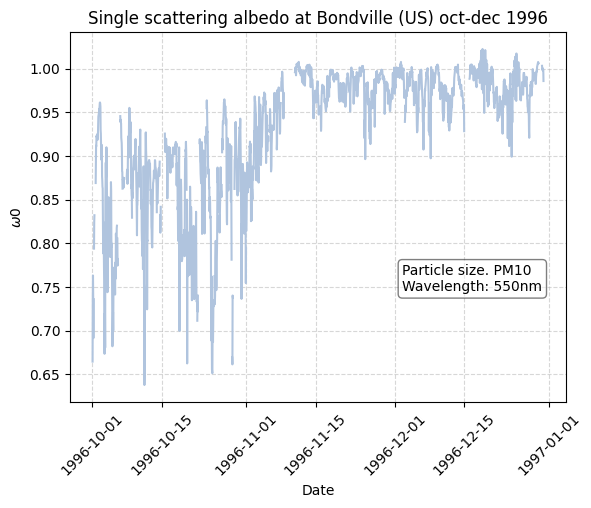

In [18]:
# Assigning the coefficients to arrays
sigma_SP = sc["aerosol_light_scattering_coefficient_amean"]
sigma_AP = ab["aerosol_absorption_coefficient_amean"]

# Executing the SSA function on our datasets
time, ssa = SSA(sigma_SP, sigma_AP)

# Plotting the results of SSA
plt.plot(time, ssa, color='lightsteelblue')
plt.xticks(rotation=45)
plt.title("Single scattering albedo at Bondville (US) oct-dec 1996")
plt.xlabel("Date")
plt.ylabel("$\omega 0$")
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.67, 0.3, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)

plt.show()

The single scattering albedo, as previously explained, is a ratio that theoretically ranges from 0 to 1. However, the plot above indicates that this is not always the case, as the SSA in certain areas exceeds 1. In most instances, these occurrences can be due to measurement errors or anomalies. For further studies, one can look at the flagged measurements specified in the metadata.

With the SSA determined, we might want to know something about the statistics of our calculations and measurements. Here are some examples.

In [19]:
# New dataframe containing SSA

df_SSA = pd.DataFrame(ssa,time)

# Inserting the coefficients into dataframe

df_SSA["sigma_SP"] = sigma_SP
df_SSA["sigma_AP"] = sigma_AP

# Editing headings in dataframe

headings = ["SSA", "sigma_SP", "sigma_AP"]
df_SSA.columns = headings

df_SSA

,SSA,sigma_SP,sigma_AP
time,,,
1996-10-01 00:30:00,0.664687,43.65,22.02
1996-10-01 01:30:00,0.737142,41.42,14.77
1996-10-01 02:30:00,0.763162,52.62,16.33
1996-10-01 03:30:00,0.738882,50.51,17.85
1996-10-01 04:30:00,0.691579,50.34,22.45
...,...,...,...
1996-12-31 19:30:00,NaN,NaN,NaN
1996-12-31 20:30:00,NaN,NaN,NaN
1996-12-31 21:30:00,NaN,NaN,NaN


### Daily mean

In [20]:
daily_mean = df_SSA.resample('D').mean()
daily_mean

,SSA,sigma_SP,sigma_AP
time,,,
1996-10-01,0.831922,54.765417,10.772222
1996-10-02,0.929965,96.850417,6.455417
1996-10-03,0.811735,11.667500,2.893750
1996-10-04,0.806608,16.566667,3.960000
1996-10-05,0.756470,22.467083,6.596087
...,...,...,...
1996-12-27,0.976364,68.604583,1.449130
1996-12-28,0.974377,35.735417,0.791667
1996-12-29,0.996304,87.985417,0.130000


Text(0.67, 0.3, 'Particle size. PM10\nWavelength: 550nm')

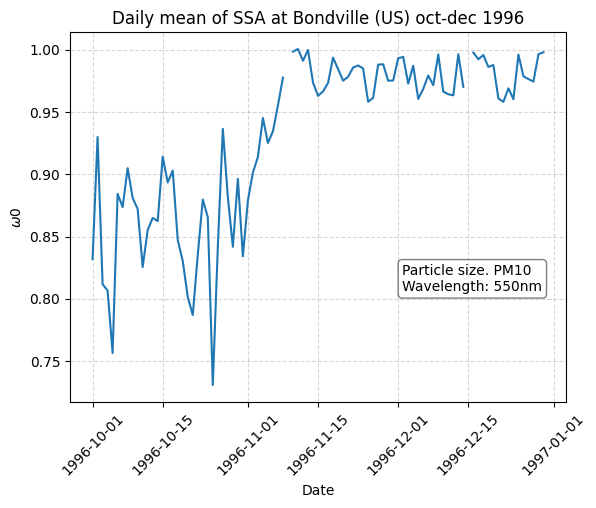

In [21]:
plt.plot(daily_mean.index, daily_mean["SSA"])
plt.ylabel("$\omega 0$")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Daily mean of SSA at Bondville (US) oct-dec 1996")
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.67, 0.3, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)

### 10-day moving average

In [22]:
moving_average = df_SSA.rolling(window=10).mean()
moving_average

,SSA,sigma_SP,sigma_AP
time,,,
1996-10-01 00:30:00,NaN,NaN,NaN
1996-10-01 01:30:00,NaN,NaN,NaN
1996-10-01 02:30:00,NaN,NaN,NaN
1996-10-01 03:30:00,NaN,NaN,NaN
1996-10-01 04:30:00,NaN,NaN,NaN
...,...,...,...
1996-12-31 19:30:00,NaN,NaN,NaN
1996-12-31 20:30:00,NaN,NaN,NaN
1996-12-31 21:30:00,NaN,NaN,NaN


Text(0.67, 0.3, 'Particle size. PM10\nWavelength: 550nm')

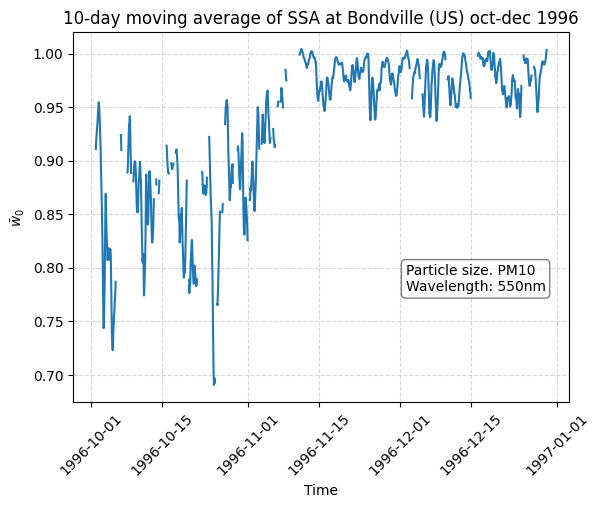

In [23]:
plt.plot(moving_average.index, moving_average["SSA"])
plt.xticks(rotation=45)
plt.title("10-day moving average of SSA at Bondville (US) oct-dec 1996")
plt.xlabel("Time")
plt.ylabel(r"$\bar w_0$")
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.67, 0.3, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)

### Standard deviation and standard error

In [24]:
n = len(df_SSA["SSA"]) # sample size
std = df_SSA["SSA"].std()

std_err = std/np.sqrt(n)

print(f"The standard deviation of the determined single scattering albedo in Bondville (US) in Oct-Dec 1996 is approximately: \n {std:.4f}")
print()
print(f"The standard error of the determined single scattering albedo in Bondville (US) in Oct-Dec 1996 is approximately: \n {std_err:.4f}")

The standard deviation of the determined single scattering albedo in Bondville (US) in Oct-Dec 1996 is approximately: 
 0.0721

The standard error of the determined single scattering albedo in Bondville (US) in Oct-Dec 1996 is approximately: 
 0.0015


## Example 2, datasets with non-matching wavelengths

By using the same procedure as for example 1, you obtain desired datasets. Here we have found data from the Birkenes II station in Norway. 

In [4]:
# Importing datasets, nephelometer and filter absoprtion photometer
opendap_url = "https://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20201124110000.20220930100606.nephelometer..pm10.22mo.1h.NO01L_TSI_3563_BIR_dry_NRT.NO01L_scat_coef.lev1.5.nc"
opendap_url0 = "https://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20170101000000.20230627082633.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.6y.1h.NO01L_Radiance-Research_PSAP-3W_BIR_dry.NO01L_abs_coef_PSAP_v1.lev2.nc"

In [5]:
neph_ds = xr.open_dataset(opendap_url)  # Opening and showing dataset with xarray
phot_ds = xr.open_dataset(opendap_url0)  # Opening and showing dataset with xarray

In [6]:
neph_ds

<xarray.Dataset>
Dimensions:                                                         (
                                                                     time: 15725,
                                                                     tbnds: 2,
                                                                     metadata_time: 1,
                                                                     Wavelength: 3,
                                                                     Location: 1,
                                                                     ...
                                                                     aerosol_light_scattering_coefficient_prec1587_qc_flags: 2,
                                                                     aerosol_light_scattering_coefficient_perc8413_qc_flags: 2,
                                                                     pressure_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_prec1587_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_perc8413_qc_flags: 1,
                                                                     aerosol_light_backscattering_coefficient_amean_qc_flags: 1)
Coordinates:
  * time                                                            (time) datetime64[ns] ...
  * metadata_time                                                   (metadata_time) datetime64[ns] ...
  * Wavelength                                                      (Wavelength) float64 ...
  * Location                                                        (Location) |S64 ...
Dimensions without coordinates: tbnds, temperature_qc_flags,
                                relative_humidity_qc_flags,
                                aerosol_light_scattering_coefficient_amean_qc_flags,
                                aerosol_light_scattering_coefficient_prec1587_qc_flags,
                                aerosol_light_scattering_coefficient_perc8413_qc_flags,
                                pressure_qc_flags,
                                aerosol_light_backscattering_coefficient_prec1587_qc_flags,
                                aerosol_light_backscattering_coefficient_perc8413_qc_flags,
                                aerosol_light_backscattering_coefficient_amean_qc_flags
Data variables: (12/29)
    time_bnds                                                       (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                              (metadata_time, tbnds) datetime64[ns] ...
    aerosol_light_scattering_coefficient_amean_ebasmetadata         (Wavelength, metadata_time) |S64 ...
    temperature_qc                                                  (Location, temperature_qc_flags, time) float64 ...
    relative_humidity_qc                                            (Location, relative_humidity_qc_flags, time) float64 ...
    aerosol_light_scattering_coefficient_prec1587_ebasmetadata      (Wavelength, metadata_time) |S64 ...
    ...                                                              ...
    aerosol_light_scattering_coefficient_prec1587                   (Wavelength, time) float64 ...
    pressure                                                        (Location, time) float64 ...
    aerosol_light_backscattering_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_light_scattering_coefficient_perc8413                   (Wavelength, time) float64 ...
    relative_humidity                                               (Location, time) float64 ...
    aerosol_light_backscattering_coefficient_prec1587               (Wavelength, time) float64 ...
Attributes: (12/109)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    ke

In [7]:
phot_ds

<xarray.Dataset>
Dimensions:                                               (time: 52560,
                                                           tbnds: 2,
                                                           metadata_time: 6,
                                                           Wavelength: 3,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 3,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 3,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 3)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Wavelength                                            (Wavelength) float64 ...
Dimensions without coordinates: tbnds,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                aerosol_absorption_coefficient_perc8413_qc_flags
Data variables:
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    aerosol_absorption_coefficient_amean_qc               (Wavelength, aerosol_absorption_coefficient_amean_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_amean_ebasmetadata     (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_prec1587_qc            (Wavelength, aerosol_absorption_coefficient_prec1587_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_perc8413_qc            (Wavelength, aerosol_absorption_coefficient_perc8413_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_perc8413_ebasmetadata  (Wavelength, metadata_time) |S64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/115)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      NO0002R, EMEP, aerosol_abs...
    id:                                            NO0002R.20170101000000.202...
    naming_authority:                              EBAS
    ...                                            ...
    geospatial_lat_units:                          degrees_north
    geospatial_lon_units:                          degrees_east
    comment:                                       {\n    "Data definition": ...
    standard_name_vocabulary:                      CF-1.7, ACDD-1.3
    history:                                       None
    creator_url:                                   ebas.nilu.no

In this case, the nephelometer has measurements at wavelengths 450, 550 and 700 nm, while the filter absoprtion photometer has 470, 522, 660 nm. We will continue to focus on the 550nm wavelength, and hence need to interpolate the data from the filter absorption photometer. The goal is to calculate the SSA for 550 nm.

### The Ångström exponent

To determine the single scattering albedo with datasets where the measuring wavelengths of the nephelometer and filter absorption photometer does not match, we can use the angstrom exponent to manipulate the data. 

The Ångström exponent parametrizes the wavelength dependence of either scattering or absorption, with the equation:

$\frac{\sigma_1}{\sigma_2}=\frac{\lambda_1}{\lambda_2}^{-\alpha}$        

Where $\sigma$ denotes either scattering or absorption coefficient at two different wavelengths, $\lambda$ denotes the wavelength and $\alpha$ the Angstrom exponent. By evaluating how the coefficients depend on wavelength and derive the Ångström exponent, we can further use this to obtain either the scattering or absorption coefficient. 

For instance, if $\alpha = -1$ for absorption coefficients, there is a uniform absorption of all wavelengths, where one example is soot. Meaning that the magnitude of the Ångström exponent for absorption coefficients is telling about the dependence of wavelength for absorption. While $\alpha$ for scattering coefficient is telling about the particle size. 

In this case we want to determine the Angstrom exponent for the light absoprtion coefficient. 

$\alpha = \frac{ln(\frac{\sigma_2}{\sigma_1})}{ln(\frac{\lambda_1}{\lambda_2})}$

To derive the absorption coefficient for $\lambda = 550 nm$, we will use the data for wavelenghts $\lambda = 522 nm, 660 nm$.

Therefore $\sigma_1$ and $\sigma_2$ denotes the ligth absorption coefficients at wavelengths $\lambda_1 = 522 nm$ and $\lambda_2 = 660 nm$

While we are working with bigger datasets, one must calculate the exponent for each timestep. Once the exponent is known, one can use it to obtain a coefficient at desired wavelength.

In [8]:
# Extracting variables and wavelenghts of interest from datasets

# Scattering
sc = neph_ds["aerosol_light_scattering_coefficient_amean"] 
sc_coeff = sc.sel(Wavelength = 550) 

# Absorption
ab = phot_ds["aerosol_absorption_coefficient_amean"] 
ab_522 = ab.sel(Wavelength = 522) 
ab_660 = ab.sel(Wavelength = 660)

In [30]:
# Converting to dataframe

sc = sc_coeff.to_dataframe()  # dataframe of scattering coefficients at wavelength 550 nm
ab522 = ab_522.to_dataframe()  # dataframe of absorption coefficients at wavelength 522 nm
ab660 = ab_660.to_dataframe()  # dataframe of absorption coefficients at wavelength 660 nm

In [31]:
# Only looking at data where both sets have measurements

start_date = pd.Timestamp("2020-12")
end_date = pd.Timestamp("2022-08")

# Filter out rows that fall outside the desired timespan
df_ab522 = ab522[(ab522.index >= start_date) & (ab522.index <= end_date)]
df_ab660 = ab660[(ab660.index >= start_date) & (ab660.index <= end_date)]
df_sc = sc[(sc.index >= start_date) & (sc.index <= end_date)]

### Function for calculating the Angstrom exponent

In [32]:
# making a function to calculate angstrom exponent

# sigma1 and sigma2: scattering or absorption coefficients
# lambda1 and lambda2: respective wavelengths

def angstrom(sigma1,sigma2,lambda1, lambda2):
    # For a smooth operation, check that datasets are even in size.
    if len(sigma1) == len(sigma2):
        A = len(sigma1)
    else:
        return print("Match length of datasets.")
    
    alpha = np.zeros(A) # empty array with length of dataset
    
    for i in range(A):
        # checking for NaNs and negative numbers
        if np.isnan(sigma1[i]) or np.isnan(sigma2[i]):
            alpha[i] = np.nan
        if sigma1[i] < 0 or sigma2[i] < 0:
            alpha[i] = np.nan
        else:
            alpha[i] = (np.log(sigma2[i]/sigma1[i]))/(np.log(lambda1/lambda2))
        time = sigma1.index
    return time, alpha

# Executing the function using the known absorption coefficients

time, alpha = angstrom(df_ab522["aerosol_absorption_coefficient_amean"], df_ab660["aerosol_absorption_coefficient_amean"],522,660)

### Plotting the Angstorm exponent

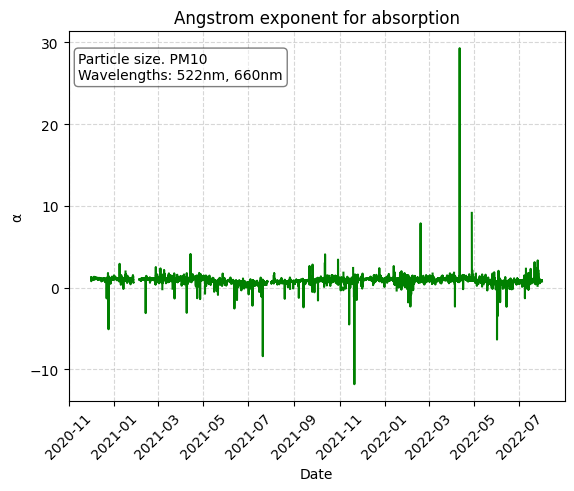

In [33]:
plt.plot(time, alpha, color='g')
plt.xticks(rotation=45)
plt.title("Angstrom exponent for absorption")
plt.xlabel("Date")
plt.ylabel("α")
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.02, 0.87, 'Particle size. PM10\nWavelengths: 522nm, 660nm', transform=plt.gca().transAxes, bbox=text_box_props)

plt.show()

Now we can use the angstrom exponent and its equation in reverse, to obtain the absorption coefficients at wavelength 550nm.
By rearranging the equation:

$\frac{\sigma_1}{\sigma_2}=\frac{\lambda_1}{\lambda_2}^{-\alpha}$

Solve for wanted coefficient. In this case it is:

$\sigma _{A550} = \frac{\lambda _{550}}{\lambda_{522}}^{-\alpha} \sigma _{A522}$

One could use either $\lambda = 522 nm$ or $\lambda = 660 nm$, as long as you use the known coefficient with the corresponding wavelength.

### Calculating absorption coefficicents at $\lambda = 550nm$

In [34]:
# a: angstrom exponent
# sigma: known coefficient, either absorption or scattering. depending on what you calculated the exponent for
# lambda_a: wavelength you want to find the coefficient for
# lambda1: wavelength for sigma

def make_coeff(a, sigma, lambda_a, lambda1):
    coeff = np.zeros(len(a))
    for i in range(len(a)):
        coeff[i] = ((lambda_a/lambda1)**(-a[i]))*sigma[i]
    time = sigma.index
    return time, coeff

# Executing the function for deriving absoprtion coefficient at wanted wavelength

time, abs_coeff550 = make_coeff(alpha, df_ab522["aerosol_absorption_coefficient_amean"], 550, 522)

df_ab550 = pd.DataFrame(abs_coeff550, time) # making into dataframe
df_ab550.columns = ["Estimated absorption coefficient, 550nm"]

### Plotting scattering coefficient and absorption coefficient at $\lambda = 550nm$ 

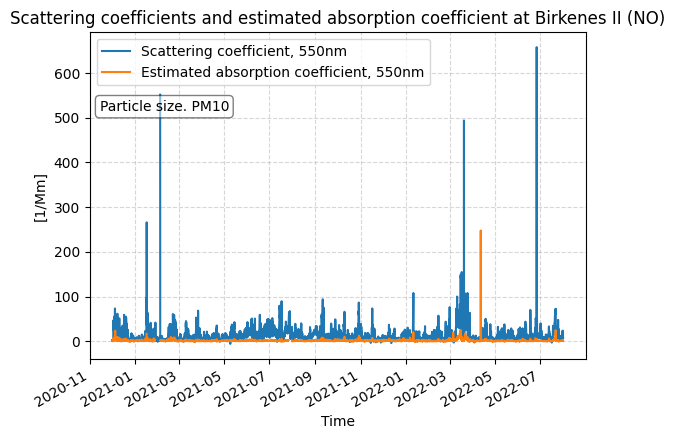

In [35]:
fig, ax = plt.subplots()

df_sc["aerosol_light_scattering_coefficient_amean"].plot(ax=ax, label="Scattering coefficient, 550nm")

df_ab550.plot(ax=ax, label="Estimated absorption coefficient, 550nm")

plt.title("Scattering coefficients and estimated absorption coefficient at Birkenes II (NO)")
plt.xlabel("Time")
plt.ylabel("[1/Mm]")
plt.legend()
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.02, 0.76, 'Particle size. PM10', transform=plt.gca().transAxes, bbox=text_box_props)

plt.show()

Before we can calculate the SSA, we need to check that the two dataframes we have for scattering coefficient and absorption coefficient matches in length. We know the data they contain spans over the same time period, but have a quick look below and see that they contain different number of measurements. To fix this, we check for any unique indexes in both dataframes and insert the ones "missing" and giving them a "NaN" value.

In [36]:
df_sc

,Wavelength,aerosol_light_scattering_coefficient_amean
time,,
2020-12-01 00:30:00,550.0,1.73604
2020-12-01 01:30:00,550.0,0.95774
2020-12-01 02:30:00,550.0,0.57248
2020-12-01 03:30:00,550.0,0.19908
2020-12-01 04:30:00,550.0,0.46737
...,...,...
2022-07-31 19:30:00,550.0,10.17101
2022-07-31 20:30:00,550.0,7.77274
2022-07-31 21:30:00,550.0,6.52109


In [37]:
df_ab550

,"Estimated absorption coefficient, 550nm"
time,
2020-12-01 00:30:00,0.434964
2020-12-01 01:30:00,0.281459
2020-12-01 02:30:00,0.151241
2020-12-01 03:30:00,0.119096
2020-12-01 04:30:00,0.155996
...,...
2022-07-31 19:30:00,1.712482
2022-07-31 20:30:00,1.593215
2022-07-31 21:30:00,1.193781


In [38]:
# Find the common indexes between df_sc and df_ab550
common_indexes = df_sc.index.intersection(df_ab550.index)

# Find the unique indexes in df_sc that are not in df_ab550
unique_indexes_sc = df_sc.index.difference(df_ab550.index)

# Find the unique indexes in df_ab550 that are not in df_sc
unique_indexes_ab550 = df_ab550.index.difference(df_sc.index)

# Create a new dataframe for df_ab550 with NaN values and reindexed with unique indexes from df_sc
df_ab550_with_nan = pd.DataFrame(index=unique_indexes_sc, columns=df_ab550.columns)
df_ab550_with_nan['Estimated absorption coefficient, 550nm'] = np.nan

# Create a new dataframe for df_sc with NaN values and reindexed with unique indexes from df_ab550
df_sc_with_nan = pd.DataFrame(index=unique_indexes_ab550, columns=df_sc.columns)
df_sc_with_nan['aerosol_light_scattering_coefficient_amean'] = np.nan

# Concatenate the original dataframe df_ab550 with df_ab550_with_nan
df_ab550_combined = pd.concat([df_ab550, df_ab550_with_nan]).sort_index()

# Concatenate the original dataframe df_sc with df_sc_with_nan
df_sc_combined = pd.concat([df_sc, df_sc_with_nan]).sort_index()

# Output the combined dataframes
print("Combined df_ab550:")
print(df_ab550_combined)

print("Combined df_sc:")
print(df_sc_combined)

Combined df_ab550:
                     Estimated absorption coefficient, 550nm
time                                                        
2020-12-01 00:30:00                                 0.434964
2020-12-01 01:30:00                                 0.281459
2020-12-01 02:30:00                                 0.151241
2020-12-01 03:30:00                                 0.119096
2020-12-01 04:30:00                                 0.155996
...                                                      ...
2022-07-31 19:30:00                                 1.712482
2022-07-31 20:30:00                                 1.593215
2022-07-31 21:30:00                                 1.193781
2022-07-31 22:30:00                                 0.855651
2022-07-31 23:30:00                                 0.815754

[14592 rows x 1 columns]
Combined df_sc:
                     Wavelength  aerosol_light_scattering_coefficient_amean
time                                                                  

### Plot of SSA

Now that we have found scattering coeffients and absorption coefficients, at the same wavelength/timespan/station, we can determine the single scattering albedo. Here using the function defined in example 1. 

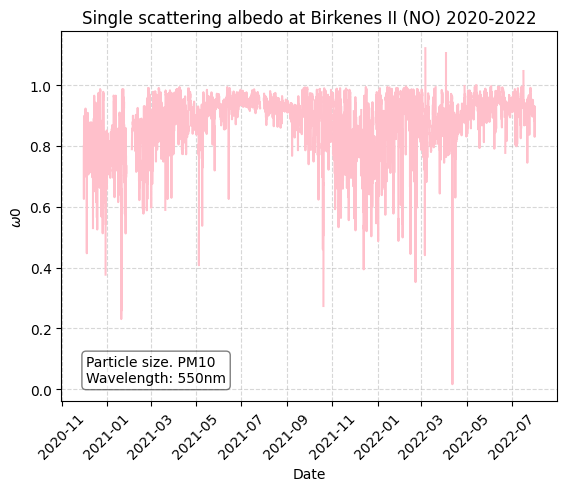

In [39]:
# Assigning the coefficients to arrays
sigma_SP = df_sc_combined["aerosol_light_scattering_coefficient_amean"]
sigma_AP = df_ab550_combined["Estimated absorption coefficient, 550nm"]

# Executing function from example 1, determining the SSA
time, ssa = SSA(sigma_SP, sigma_AP)

# Plotting the SSA
plt.plot(time, ssa, color='pink')
plt.xticks(rotation=45)
plt.title("Single scattering albedo at Birkenes II (NO) 2020-2022")
plt.xlabel("Date")
plt.ylabel("$\omega 0$")
plt.gca().set_facecolor('white')
plt.grid(True, linestyle='--', alpha=0.5)
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.05, 0.05, 'Particle size. PM10\nWavelength: 550nm', transform=plt.gca().transAxes, bbox=text_box_props)

plt.show()

If you should encounter datasets with non matching wavelenghts, but say for instance that it is the filter absorption photometer that has data for the wanted wavelength and the nephelometer has measurements at different wavelengths. You can then follow the same procedure by calculating the Angstrom exponent, but instead use the scattering coefficients at wavelengths surrounding your desired wavelength. When you have obtained the Angstrom exponent for scattering at all timesteps, apply it in reverese to calculate the scattering coefficient at desired wavelength, and lastly use this in combination with the filter absoprtion photometers absorption coefficicents to determine the SSA.

In [40]:
# New dataframe containing SSA

df_SSA = pd.DataFrame(ssa,time)

# Inserting the coefficients into dataframe

df_SSA["sigma_SP"] = sigma_SP
df_SSA["sigma_AP"] = sigma_AP

# Editing headings in dataframe

headings = ["SSA", "sigma_SP", "sigma_AP"]
df_SSA.columns = headings

df_SSA

,SSA,sigma_SP,sigma_AP
time,,,
2020-12-01 00:30:00,0.799649,1.73604,0.434964
2020-12-01 01:30:00,0.772870,0.95774,0.281459
2020-12-01 02:30:00,0.791023,0.57248,0.151241
2020-12-01 03:30:00,0.625691,0.19908,0.119096
2020-12-01 04:30:00,0.749752,0.46737,0.155996
...,...,...,...
2022-07-31 19:30:00,0.855894,10.17101,1.712482
2022-07-31 20:30:00,0.829893,7.77274,1.593215
2022-07-31 21:30:00,0.845262,6.52109,1.193781


Further, statistics can be done on the data as shown in example 1. 